# Importar librerias y montar Drive

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Carga Dataset Voice
Dataset elegido con mas de 3000 registros y 19 features

In [13]:
dataset=pd.read_csv('/content/drive/MyDrive/Proyecto/voice.csv')
dataset

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


# Quitar ID's y Atributos además separar X y Y

In [14]:
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values
X

array([[0.05978098, 0.06424127, 0.03202691, ..., 0.0078125 , 0.        ,
        0.        ],
       [0.06600874, 0.06731003, 0.04022873, ..., 0.0546875 , 0.046875  ,
        0.05263158],
       [0.0773155 , 0.08382942, 0.03671846, ..., 0.015625  , 0.0078125 ,
        0.04651163],
       ...,
       [0.14205626, 0.09579843, 0.18373124, ..., 2.9375    , 2.9296875 ,
        0.19475862],
       [0.14365874, 0.09062826, 0.18497617, ..., 3.59375   , 3.5859375 ,
        0.31100218],
       [0.16550895, 0.09288354, 0.18304392, ..., 0.5546875 , 0.546875  ,
        0.35      ]])

In [15]:
Y

array(['male', 'male', 'male', ..., 'female', 'female', 'female'],
      dtype=object)

# Encoder para Y Class o Label

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)
Y
# male =1 female = 0

array([1, 1, 1, ..., 0, 0, 0])

# Para Entrenamiento y Para Prueba


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.25, random_state=0)


# Escalado

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [19]:
X_train

array([[ 0.09767467,  0.09509476,  0.42032103, ..., -0.13286286,
        -0.12451985, -0.26334622],
       [-0.35848485,  1.11527934, -0.45159498, ...,  0.54459212,
         0.55742084, -0.02287791],
       [-0.70387362,  0.11485901, -0.58556765, ..., -0.42161417,
        -0.43105996,  1.10093954],
       ...,
       [-1.5719578 ,  1.50482645, -1.23038323, ..., -0.34387343,
        -0.33554384, -0.16422602],
       [ 1.90149339, -1.64978028,  1.57609724, ...,  1.3197783 ,
         1.32821373, -0.43030433],
       [ 0.19254193, -1.39349351,  0.14702   , ...,  1.19317196,
         1.20159934, -0.32447473]])

# Entrenamiento

In [21]:
from sklearn.linear_model import LogisticRegression
clas=LogisticRegression(random_state=0)
clas.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Prediccion

In [22]:
y_pred=clas.predict(X_test)


# Matriz de Confusión

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[364   9]
 [  7 412]]


0.9797979797979798

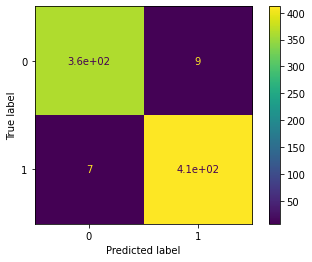

In [28]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clas, X_test, y_test)
plt.show()